https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

2023.07.03 1956i  
its getting dark here  
lets get init  

In [59]:
import pandas as pd
try:
    df = pd.read_csv('diabetes.csv')
except:
    df = pd.read_csv('abcs')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
df.shape

(768, 9)

In [61]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Check null

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [63]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [64]:
# Check if there are any duplicates
if df.duplicated().any():
    print("Duplicates exist in the DataFrame.")
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    # Check if there are any duplicates
    if df.duplicated().any():
        print("Duplicates exist in the DataFrame.")
    else:
        print("No duplicates found in the DataFrame.")

else:  
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


## Data processing

0 values

In [65]:
# DataFrame에서 0의 개수 확인
zero_counts = (df == 0).sum()

# 각 레이블(열)별로 0의 개수 출력
for label, count in zero_counts.iteritems():
    print(f"Number of zeros in {label}: {count}")


Number of zeros in Pregnancies: 111
Number of zeros in Glucose: 5
Number of zeros in BloodPressure: 35
Number of zeros in SkinThickness: 227
Number of zeros in Insulin: 374
Number of zeros in BMI: 11
Number of zeros in DiabetesPedigreeFunction: 0
Number of zeros in Age: 0
Number of zeros in Outcome: 500


Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age, cant be 0. So we have to replace it to mean or median

In [66]:
import numpy as np

# Replace zero values with NaN
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']].replace(0, np.nan)
from sklearn.impute import SimpleImputer


# Initialize the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Perform imputation on the DataFrame
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']] = imputer.fit_transform(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']])


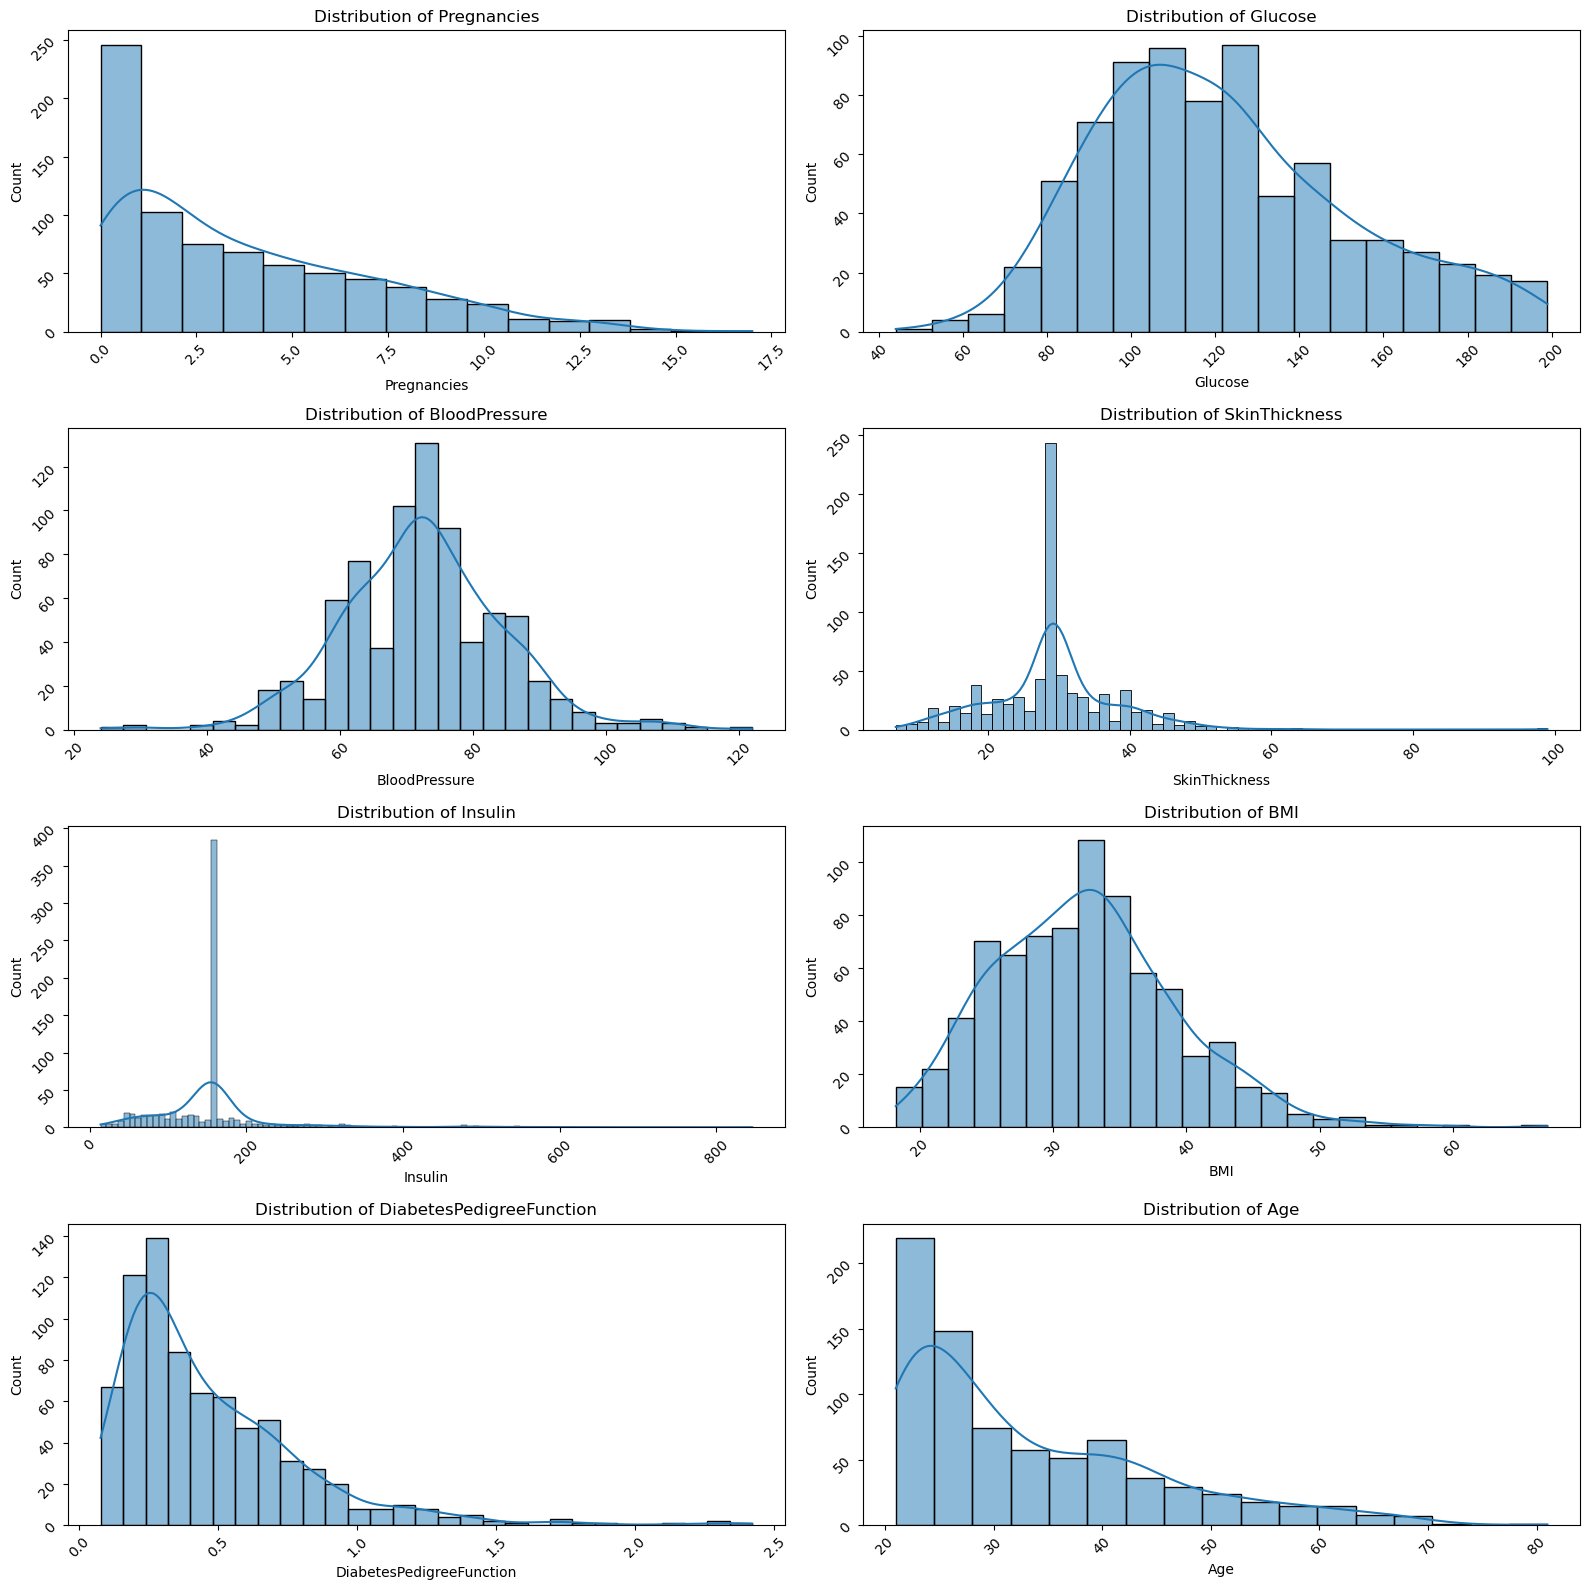

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the column names from the DataFrame
columns = df.columns

fig, axes = plt.subplots(4, 2, figsize=(16, 16))

for i, ax in enumerate(axes.flat):
    if i < len(columns):
        sns.histplot(df[columns[i]], kde=True, ax=ax)
        ax.set_title('Distribution of ' + columns[i])
        ax.tick_params(labelrotation=45)

# Remove the extra subplots
if len(columns) < 8:
    for j in range(i+1, 8):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


## Train , Test

In [68]:
x = df.drop(['Outcome'],axis=1)
y = df['Outcome']

print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y)

print(x_train.shape,x_test.shape)

(768, 8)
(768,)
(576, 8) (192, 8)


## Data standardization

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)  # Apply the same transformation to the test set


In [70]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

cqd = QuadraticDiscriminantAnalysis(store_covariance=True)

cqd.fit(x_train,y_train) #QDA
y_train_pred = cqd.predict(x_train)
y_test_pred = cqd.predict(x_test)

print("Train Accuracy: %.4f"%accuracy_score(y_train, y_train_pred))
print("Test Accuracy: %.4f"%accuracy_score(y_test, y_test_pred))


Train Accuracy: 0.7760
Test Accuracy: 0.7500


In [71]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(cqd, x_train, y_train, cv=5)

print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Cross-validation accuracy: 0.76 (+/- 0.06)
